In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_competencia = pd.read_pickle("../data/limpieza/hoteles_competencia_completo.pkl")
df_propios = pd.read_pickle("../data/limpieza/hoteles_propios.pkl")
df_final = pd.read_pickle("../data/final/hoteles_final.pkl")

# INSIGHTS

1. PRECIOS
2. VALORACION
3. VALORACIONS VS PRECIO
4. GENERAL
5. FECHAS
5. TOP 10

### 1. PRECIOS

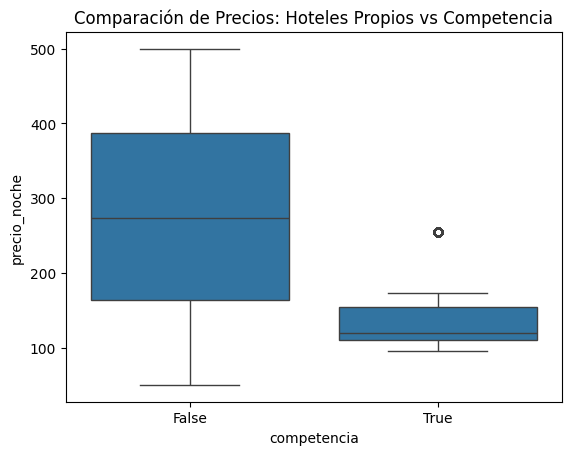

In [3]:
sns.boxplot(data=df_final, x="competencia", y="precio_noche")
plt.title("Comparación de Precios: Hoteles Propios vs Competencia")
plt.show()


- Competencia:  
    Sus precios son muchos más bajos y concentrados (110€-170€) con un outlier que ronda los 250€ (donde se encuentran la mayoría de nuestros hoteles).  

- Propios  

    Nuestros precios abarcan desde hoteles low cost de 50€ hasta hoteles de lujo de aprox 500€.  
    La dispersión es mayor (180€-390€).


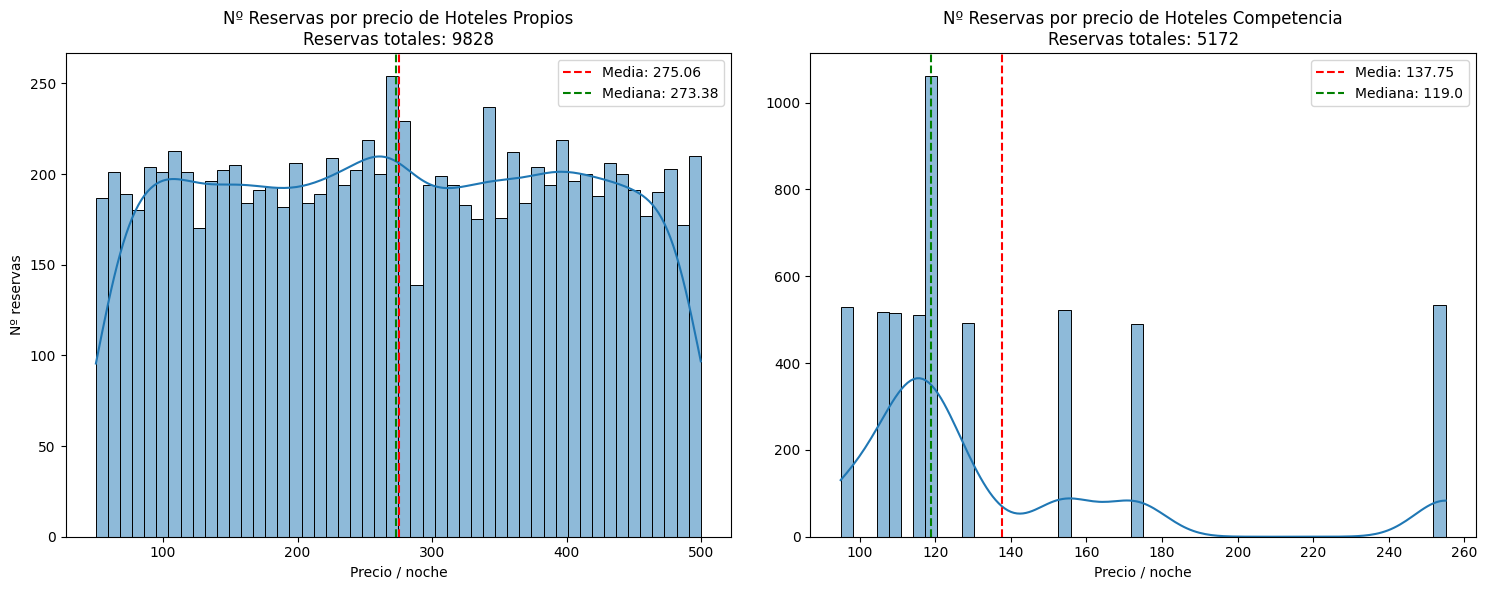

In [4]:
media_propios = np.mean(df_propios["precio_noche"])
mediana_propios = np.median(df_propios["precio_noche"])
reservas_totales_propios = df_propios.shape[0]

media_competencia = np.mean(df_competencia["precio_noche"])
mediana_competencia = np.median(df_competencia["precio_noche"])
reservas_totales_competencia = df_competencia.shape[0]


fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.histplot(df_propios["precio_noche"], bins=50, kde=True, ax=axes[0])
axes[0].set_title(f"Nº Reservas por precio de Hoteles Propios\nReservas totales: {reservas_totales_propios}")
axes[0].set_xlabel("Precio / noche")
axes[0].set_ylabel("Nº reservas")
axes[0].axvline(media_propios, color="red", linestyle="dashed", label=f"Media: {round(media_propios, 2)}")
axes[0].axvline(mediana_propios, color="green", linestyle="dashed", label=f"Mediana: {round(mediana_propios, 2)}")
axes[0].legend()


sns.histplot(df_competencia["precio_noche"], bins=50, kde=True, ax=axes[1])
axes[1].set_title(f"Nº Reservas por precio de Hoteles Competencia\nReservas totales: {reservas_totales_competencia}")
axes[1].set_xlabel("Precio / noche")
axes[1].set_ylabel(" ")
axes[1].axvline(media_competencia, color="red", linestyle="dashed", label=f"Media: {round(media_competencia, 2)}")
axes[1].axvline(mediana_competencia, color="green", linestyle="dashed", label=f"Mediana: {round(mediana_competencia, 2)}")
axes[1].legend()


plt.tight_layout()
plt.show()



Los hoteles propios de media tienen precios por noche práctimente el doble de altos que los de la comeptencia. Pero a pesar de tener precios más elevados, los hoteles propios han recibido casi el doble de reservas (+90%) que los de la competencia.

Las reservas en nuestros hoteles están mucho más distribuidas que en los de la competencia, donde más de 1000 de sus reservas (aprox 20%) se concentran en hoteles con un precio de 120€/noche. En nuestro caso, la mayor concentración de reservas resulta en un 2.5% del total a un precio de 275€/noche.

**CONCLUSIÓN**  
Los hoteles propios tienen precios más elevados pero aún así consiguen más reservas. Esto sugiere que:
- A: El valor percibido de estos hoteles justifica el precio más alto, lo que intentaremos corroborar más adelante.
- B: Si las valoraciones de nuestros clientes a nuetros hoteles son más bajas que los de la competencia, podría indicar que nuestro público objetivo es diferente: quizá con un poder adquisitivo mayor que no le importa pagar de más, por ejemplo por reservar con menos antelación debido a que viajan por negocio en vez de por ocio.

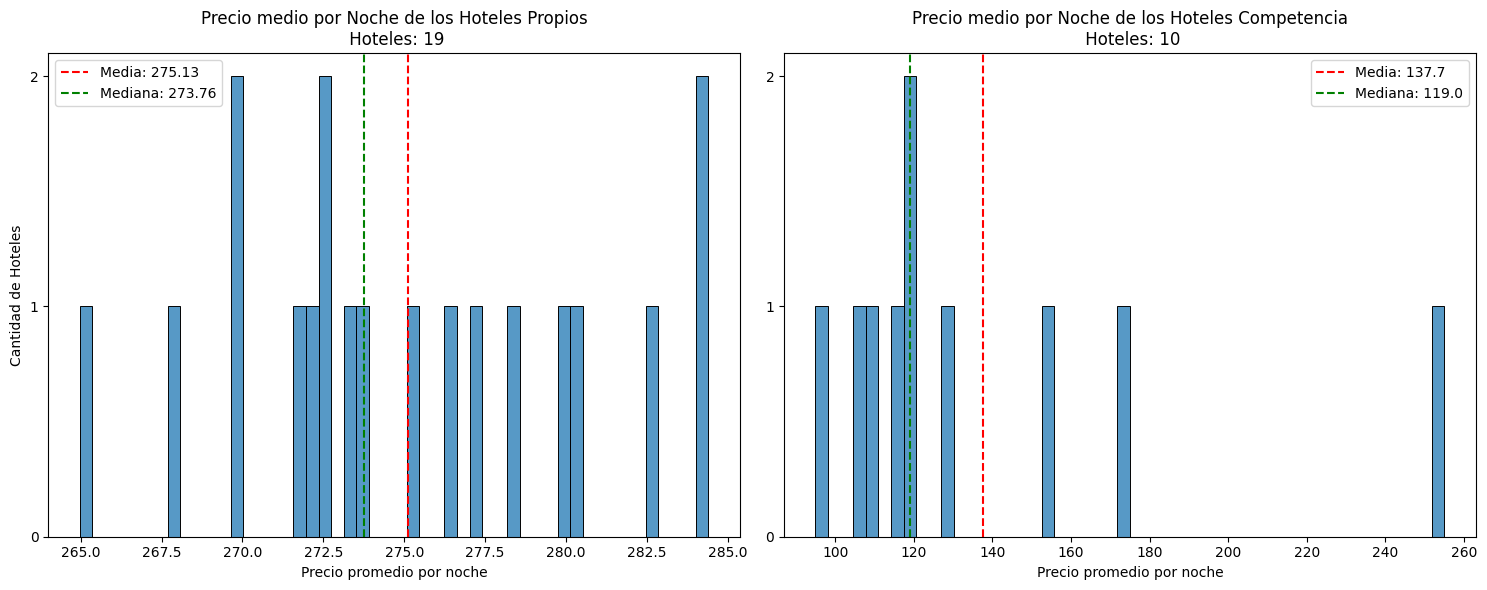

In [5]:
df_media_precio_hoteles_propios = df_propios.groupby("nombre_hotel")["precio_noche"].mean().reset_index()
total_hoteles_propios = df_media_precio_hoteles_propios.shape[0]
media_precio_propios = df_media_precio_hoteles_propios["precio_noche"].mean()
mediana_precio_propios = df_media_precio_hoteles_propios["precio_noche"].median()

df_media_precio_hoteles_competencia = df_competencia.groupby("nombre_hotel")["precio_noche"].mean().reset_index()
total_hoteles_competencia = df_media_precio_hoteles_competencia.shape[0]
media_precio_competencia = df_media_precio_hoteles_competencia["precio_noche"].mean()
mediana_precio_competencia = df_media_precio_hoteles_competencia["precio_noche"].median()


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_media_precio_hoteles_propios["precio_noche"], bins=50, ax=axes[0])
axes[0].set_title(f"Precio medio por Noche de los Hoteles Propios\n Hoteles: {total_hoteles_propios}")
axes[0].set_xlabel("Precio promedio por noche")
axes[0].set_ylabel("Cantidad de Hoteles")
axes[0].axvline(media_precio_propios, color="red", linestyle="dashed", label=(f"Media: {round(media_precio_propios, 2)}"))
axes[0].axvline(mediana_precio_propios, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_precio_propios, 2)}"))
axes[0].set_yticks(np.arange(0, 3, 1))
axes[0].legend()

sns.histplot(df_media_precio_hoteles_competencia["precio_noche"], bins=50, ax=axes[1])
axes[1].set_title(f"Precio medio por Noche de los Hoteles Competencia\n Hoteles: {total_hoteles_competencia}")
axes[1].set_xlabel("Precio promedio por noche")
axes[1].set_ylabel("")
axes[1].axvline(media_precio_competencia, color="red", linestyle="dashed", label=(f"Media: {round(media_precio_competencia, 2)}"))
axes[1].axvline(mediana_precio_competencia, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_precio_competencia, 2)}"))
axes[1].set_yticks(np.arange(0, 3, 1))
axes[1].legend()

plt.tight_layout()
plt.show()


El precio prmedio el hotel más caro de la competencia no llega al precio prmedio del hotel propio más barato.   
La diferencia de precios en los hoteles propios en escasa: 20€ desde el hotel con la media por noche más baja al hotel con la media por noche más alta.  
De hecho, casi el 60% de nuestros hoteles estan en un precio noche promedio de 10€ de diferencia (270€-280€).

### 2. VALORACION

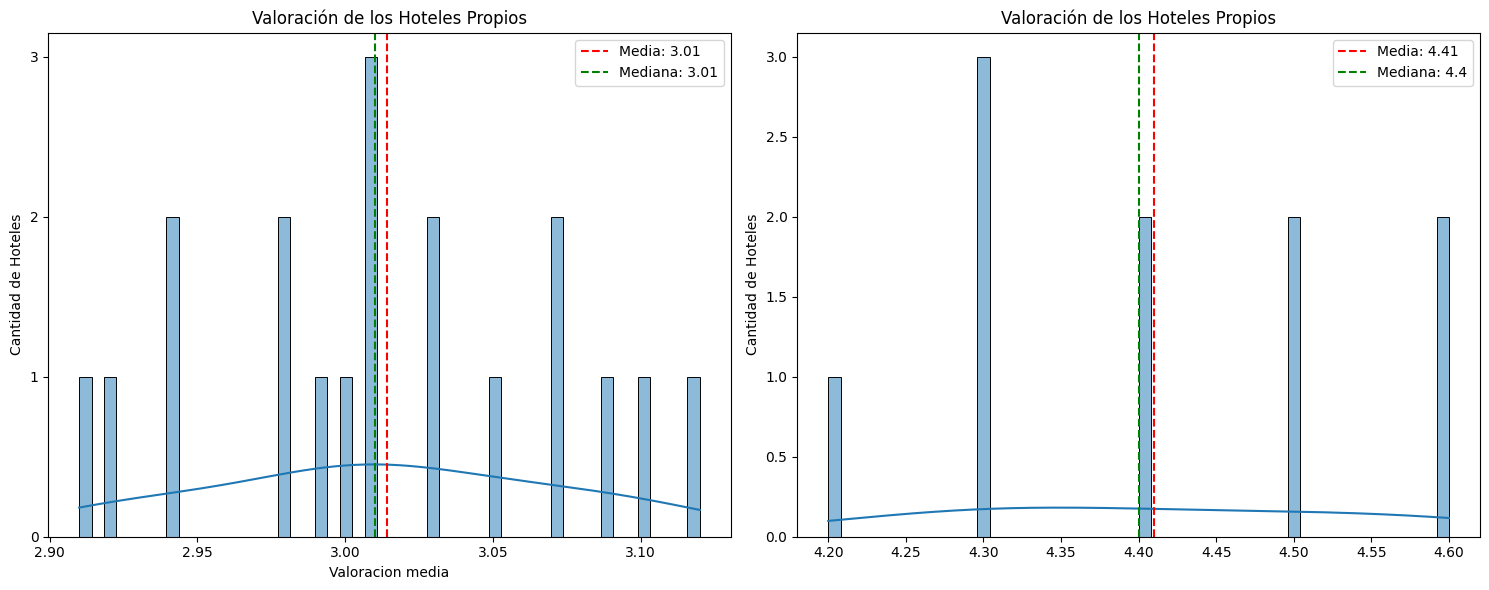

In [6]:
df_media_val_hoteles_propios = df_propios.groupby("nombre_hotel")["valoracion"].mean().reset_index()
df_media_val_hoteles_competencia = df_competencia.groupby("nombre_hotel")["valoracion"].mean().reset_index()

media_valoracion_propios = np.mean(df_propios["valoracion"])
mediana_valoracion_propios = np.median(df_propios["valoracion"])


media_valoracion_competencia = np.mean(df_competencia["valoracion"])
mediana_valoracion_competencia = np.median(df_competencia["valoracion"])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_media_val_hoteles_propios["valoracion"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Valoración de los Hoteles Propios")
axes[0].set_xlabel("Valoracion media")
axes[0].set_ylabel("Cantidad de Hoteles")
axes[0].axvline(media_valoracion_propios, color="red", linestyle="dashed", label=(f"Media: {round(media_valoracion_propios, 2)}"))
axes[0].axvline(mediana_valoracion_propios, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_valoracion_propios, 2)}"))
axes[0].set_yticks(np.arange(0, 4, 1))
axes[0].legend()

sns.histplot(df_media_val_hoteles_competencia["valoracion"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Valoración de los Hoteles Propios")
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Cantidad de Hoteles")
axes[1].axvline(media_valoracion_competencia, color="red", linestyle="dashed", label=(f"Media: {round(media_valoracion_competencia, 2)}"))
axes[1].axvline(mediana_valoracion_competencia, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_valoracion_competencia, 2)}"))
axes[0].set_yticks(np.arange(0, 4, 1))
axes[1].legend()

plt.tight_layout()
plt.show()


- Nuestros hoteles tienen menos valoración de media que los de la competencia.  
- Al contrario que con los precios medios por noche, la valoración media de nuestro mejor hotel es 1 punto menor que la valoracion media del peor hotel de la competencia.  
- Esto es preocupante porque nuestros precios son el doble de altos pero sin embargo nuestros clientes no están igual de satisfetos que los clientes de la competencia con precios la mitad de caros.
- Si los nuestros hoteles siguen manteniendo precios altos con menor valoración que la competencia podrían perder clientes.


### 3. VALORACION-PRECIO Propios VS Competencia

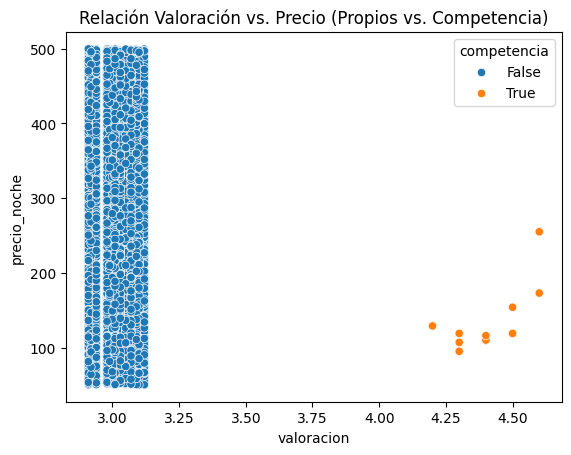

In [7]:
sns.scatterplot(data=df_final, x="valoracion", y="precio_noche", hue="competencia")
plt.title("Relación Valoración vs. Precio (Propios vs. Competencia)")
plt.show()


Podemos observar que en los propios hay hoteles de 50€ y de 500€ que tienen la misma valoración.   
No hay una correlación fuerte entre el precio por noche y la valoración de los clientes.  
Esto deberíamos revisarlo y ver por qué los clientes no tienen una percepción asociada al nivel de precios. 

### 4. HOTELES GENERAL

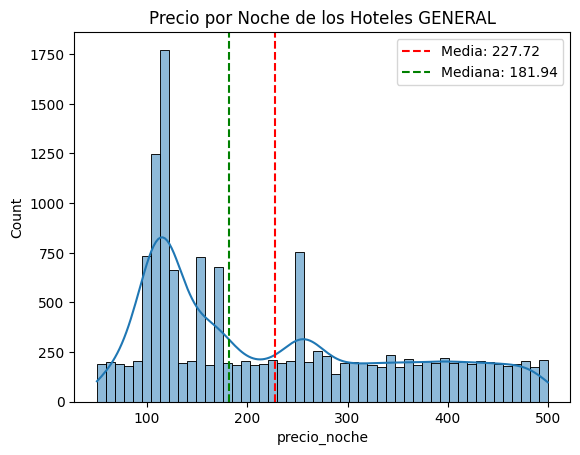

In [8]:
media = np.mean(df_final["precio_noche"])
mediana = np.median(df_final["precio_noche"])

sns.histplot(df_final["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

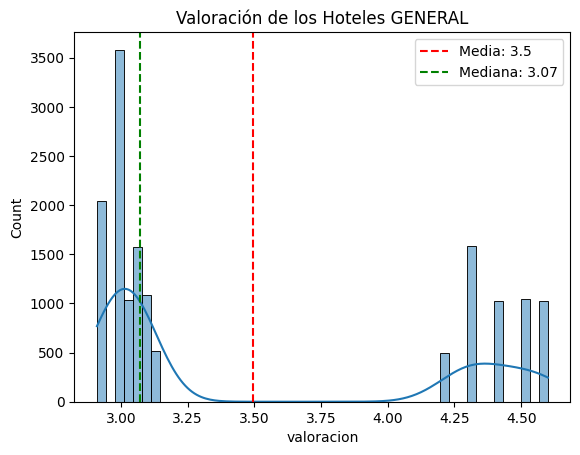

In [9]:
media = np.mean(df_final["valoracion"])
mediana = np.median(df_final["valoracion"])

sns.histplot(df_final["valoracion"], bins=50, kde=True)
plt.title("Valoración de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}"))
plt.legend()
plt.show()

### 5. RESERVAS

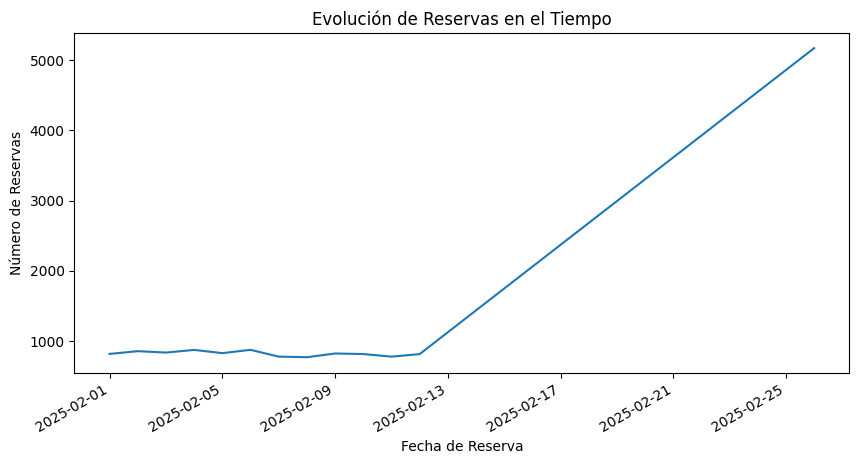

In [10]:
reservas_por_dia = df_final.groupby("fecha_reserva")["id_reserva"].count()
reservas_por_dia.plot(kind="line", figsize=(10,5))
plt.title("Evolución de Reservas en el Tiempo")
plt.ylabel("Número de Reservas")
plt.xlabel("Fecha de Reserva")
plt.show()


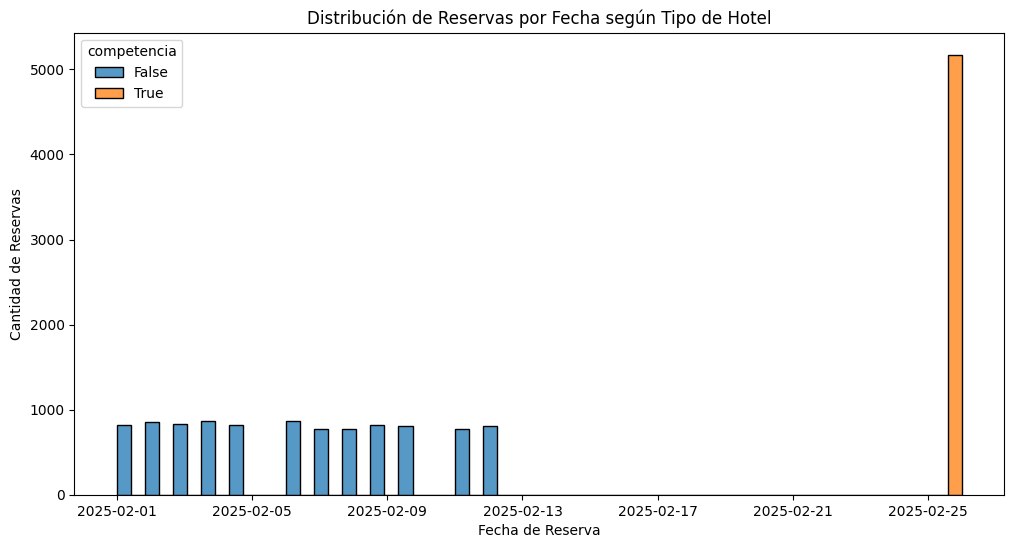

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_final, x="fecha_reserva", hue="competencia", multiple="dodge", bins=30)
plt.xlabel("Fecha de Reserva")
plt.ylabel("Cantidad de Reservas")
plt.title("Distribución de Reservas por Fecha según Tipo de Hotel")
plt.show()


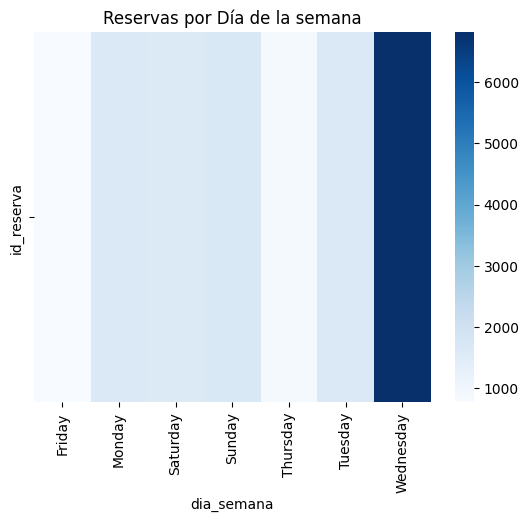

In [12]:
df_final["dia_semana"] = df_final["fecha_reserva"].dt.day_name()
pivot_data = df_final.pivot_table(columns="dia_semana", values="id_reserva", aggfunc="count")
sns.heatmap(pivot_data, cmap="Blues")
plt.title("Reservas por Día de la semana")
plt.show()


### 6. TOP 10

In [13]:
df_final["ingreso_reserva"] = df_final["precio_noche"] * (df_final["final_estancia"] - df_final["inicio_estancia"]).dt.days

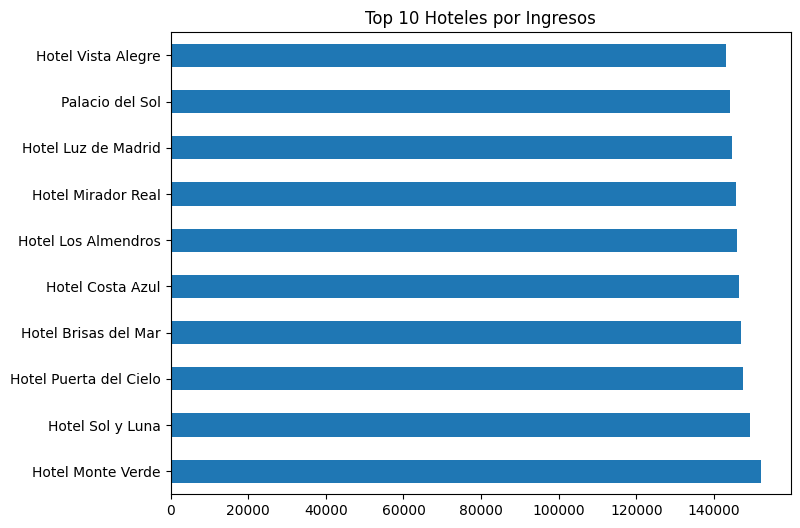

In [14]:
ingresos_hoteles = df_final.groupby("nombre_hotel")["ingreso_reserva"].sum().sort_values(ascending=False).head(10)
ingresos_hoteles.plot(kind="barh", figsize=(8,6))
plt.title("Top 10 Hoteles por Ingresos")
plt.ylabel("")
plt.show()


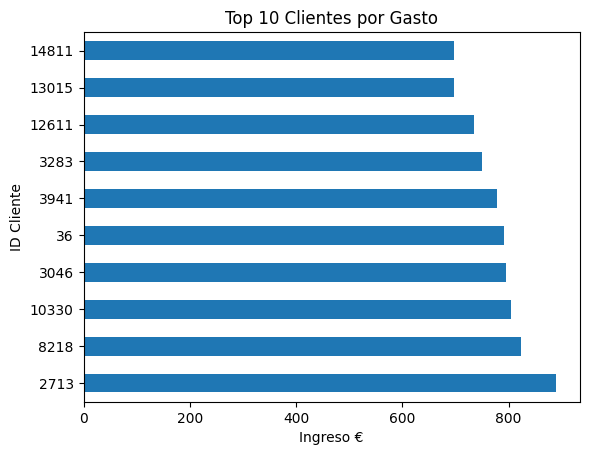

In [15]:
gasto_por_cliente = df_final.groupby("id_cliente")["ingreso_reserva"].sum()
top_10_clientes = gasto_por_cliente.sort_values(ascending=False).head(10)

top_10_clientes.plot(kind="barh", title="Top 10 Clientes por Gasto")

plt.xlabel("Ingreso €")
plt.ylabel("ID Cliente")

plt.show()

In [16]:
df_final.drop(columns="ingreso_reserva", inplace=True)

In [17]:
df_final.columns

Index(['id_reserva', 'id_cliente', 'nombre', 'apellido', 'mail', 'competencia',
       'fecha_reserva', 'inicio_estancia', 'final_estancia', 'id_hotel',
       'precio_noche', 'nombre_hotel', 'valoracion', 'ciudad', 'dia_semana'],
      dtype='object')